In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
data = pd.read_csv("/workspaces/TeamCPH/data/combined_df_corrected.csv")
data.head()  # Print first few rows to verify

output_path = "/workspaces/TeamCPH/DK_model_df.csv"

data.to_csv(output_path, index=False)

print(f"DK_model_df exported to: {output_path}")

DK_model_df exported to: /workspaces/TeamCPH/DK_model_df.csv


In [75]:
# Handle missing values by removing rows with any missing values
prepared_data = data.dropna()

# Display the shape of the prepared data set
print(prepared_data.shape)
# Display the first few rows of the prepared data set
prepared_data.head()

(10560, 22)


,Date,Holiday,NextDayHoliday,IsWeekend,Month,KielerWeek,IsNewYearsEve,IsHalloween,t,lag_1,...,year_sin1,year_cos1,year_sin2,year_cos2,Revenue,Product_2,Product_3,Product_4,Product_5,Product_6
28,2013-07-29,True,True,False,7,False,False,False,28,1755.802590,...,0.463258,0.886224,0.821100,0.570784,183.564164,False,False,False,False,False
29,2013-07-30,True,True,False,7,False,False,False,29,1581.050773,...,0.478434,0.878124,0.840248,0.542202,132.111640,False,False,False,False,False
30,2013-07-31,True,True,False,7,False,False,False,30,1600.847329,...,0.493468,0.869764,0.858402,0.512978,144.745432,False,False,False,False,False
31,2013-08-01,True,True,False,8,False,False,False,31,1560.649381,...,0.508356,0.861147,0.875539,0.483147,157.854023,False,False,False,False,False
32,2013-08-02,True,True,False,8,False,False,False,32,1512.753817,...,0.523094,0.852275,0.891640,0.452745,117.359342,False,False,False,False,False


In [76]:
# Identify categorical and numerical columns
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
#show a list of categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Date']
Numerical Features: ['Month', 't', 'lag_1', 'roll7_mean', 'roll28_mean', 'year_sin1', 'year_cos1', 'year_sin2', 'year_cos2', 'Revenue']


In [77]:
# Define categorical features
categorical_features = ['Date']

# Inspect data types and unique values for categorical columns
print(data[categorical_features].dtypes)
print("Unique Values:\n",data[categorical_features].apply(lambda x: x.unique()))

# Ensure categorical columns are treated as categories
for col in categorical_features:
    data[col] = data[col].astype('category')

# Encode categorical variables using pd.get_dummies
features = pd.get_dummies(data[categorical_features], dtype=int)

# Include any numeric columns that are not categorical
numeric_features = ['Month', 't', 'lag_1', 'roll7_mean', 'roll28_mean', 'year_sin1', 'year_cos1', 'year_sin2', 'year_cos2']
for col in numeric_features:
    if col in data.columns:
        features[col] = data[col]

# Construct the prepared data set including the dependent variable ('Revenue')
prepared_data = pd.concat([data[['Revenue']], features], axis=1)

# Handle missing values by removing rows with any missing values
prepared_data = prepared_data.dropna()

# Display the shape of the prepared data set
print(prepared_data.shape)
# Display the first few rows of the prepared data set
prepared_data.head()

Date    object
dtype: object
Unique Values:
             Date
0     2013-07-01
1     2013-07-02
2     2013-07-03
3     2013-07-04
4     2013-07-05
...          ...
1811  2018-07-27
1812  2018-07-28
1813  2018-07-29
1814  2018-07-30
1815  2018-07-31

[1816 rows x 1 columns]
(10560, 1826)


,Revenue,Date_2013-07-01,Date_2013-07-02,Date_2013-07-03,Date_2013-07-04,Date_2013-07-05,Date_2013-07-06,Date_2013-07-07,Date_2013-07-08,Date_2013-07-09,...,Date_2018-07-31,Month,t,lag_1,roll7_mean,roll28_mean,year_sin1,year_cos1,year_sin2,year_cos2
28,183.564164,0,0,0,0,0,0,0,0,0,...,0,7,28,1755.802590,1605.561883,1476.802137,0.463258,0.886224,0.821100,0.570784
29,132.111640,0,0,0,0,0,0,0,0,0,...,0,7,29,1581.050773,1612.506455,1487.937911,0.478434,0.878124,0.840248,0.542202
30,144.745432,0,0,0,0,0,0,0,0,0,...,0,7,30,1600.847329,1625.272336,1494.039301,0.493468,0.869764,0.858402,0.512978
31,157.854023,0,0,0,0,0,0,0,0,0,...,0,8,31,1560.649381,1622.625547,1509.624104,0.508356,0.861147,0.875539,0.483147
32,117.359342,0,0,0,0,0,0,0,0,0,...,0,8,32,1512.753817,1624.612586,1521.354256,0.523094,0.852275,0.891640,0.452745


In [78]:
# Set a random seed for reproducibility
np.random.seed(42)

# Shuffle the data
prepared_data = prepared_data.sample(frac=1).reset_index(drop=True)

# Calculate the number of rows for each dataset
n_total = len(prepared_data)
n_training = int(0.7 * n_total)
n_validation = int(0.20 * n_total)

# Split the features and labels for training, validation, and test
training_data = prepared_data.iloc[:n_training]
validation_data = prepared_data.iloc[n_training:n_training+n_validation]
test_data = prepared_data.iloc[n_training+n_validation:]

# Separating features and labels
training_features = training_data.drop('Revenue', axis=1)
validation_features = validation_data.drop('Revenue', axis=1)
test_features = test_data.drop('Revenue', axis=1)

training_labels = training_data[['Revenue']]
validation_labels = validation_data[['Revenue']]
test_labels = test_data[['Revenue']]

# Print dimensions of the dataframes
print("Training features dimensions:", training_features.shape)
print("Validation features dimensions:", validation_features.shape)
print("Test features dimensions:", test_features.shape)
print()
print("Training labels dimensions:", training_labels.shape)
print("Validation labels dimensions:", validation_labels.shape)
print("Test labels dimensions:", test_labels.shape)

Training features dimensions: (7391, 1825)
Validation features dimensions: (2112, 1825)
Test features dimensions: (1057, 1825)

Training labels dimensions: (7391, 1)
Validation labels dimensions: (2112, 1)
Test labels dimensions: (1057, 1)


In [79]:
# Create subdirectory for the pickle files
subdirectory = "pickle_data"
os.makedirs(subdirectory, exist_ok=True)

# Export of the prepared data to subdirectory as pickle files
training_features.to_pickle(f"{subdirectory}/training_features.pkl")
validation_features.to_pickle(f"{subdirectory}/validation_features.pkl")
test_features.to_pickle(f"{subdirectory}/test_features.pkl")
training_labels.to_pickle(f"{subdirectory}/training_labels.pkl")
validation_labels.to_pickle(f"{subdirectory}/validation_labels.pkl")
test_labels.to_pickle(f"{subdirectory}/test_labels.pkl")

In [80]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())

Loaded Training features dimensions: (7391, 1825)
Loaded Validation features dimensions: (2112, 1825)
Loaded Test features dimensions: (1057, 1825)

Loaded Training labels dimensions: (7391, 1)
Loaded Validation labels dimensions: (2112, 1)
Loaded Test labels dimensions: (1057, 1)

First few rows of loaded training features:
   Date_2013-07-01  Date_2013-07-02  Date_2013-07-03  Date_2013-07-04  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Date_2013-07-05  Date_2013-07-06  Date_2013-07-07  Date_2013-07-08  \
0                0                0                0                0   
1                0                0                0                0   
2              

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  Dense(64, activation='relu'),    # Increase from 10
  Dense(32, activation='relu'),    # Add more layers
  Dense(16, activation='relu'),
  Dense(1)
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │       116,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,489 (466.75 KB)

 Trainable params: 119,489 (466.75 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=100,
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 25751.8184 - val_loss: 23084.6152
Epoch 2/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24544.1230 - val_loss: 23189.7441
Epoch 3/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24575.4453 - val_loss: 23031.7070
Epoch 4/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24385.9492 - val_loss: 23134.7949
Epoch 5/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24354.0898 - val_loss: 22719.8027
Epoch 6/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24160.8066 - val_loss: 22686.3262
Epoch 7/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24088.3496 - val_loss: 23266.0625
Epoch 8/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23960.6270 - val_loss: 22346.1797
Epoch 9/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23925.0762 - val_loss: 22305.2910
Epoch 10/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23755.5840 - val_loss: 22434.4082
Epoch 11/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

In [83]:
model.save("python_model.h5")


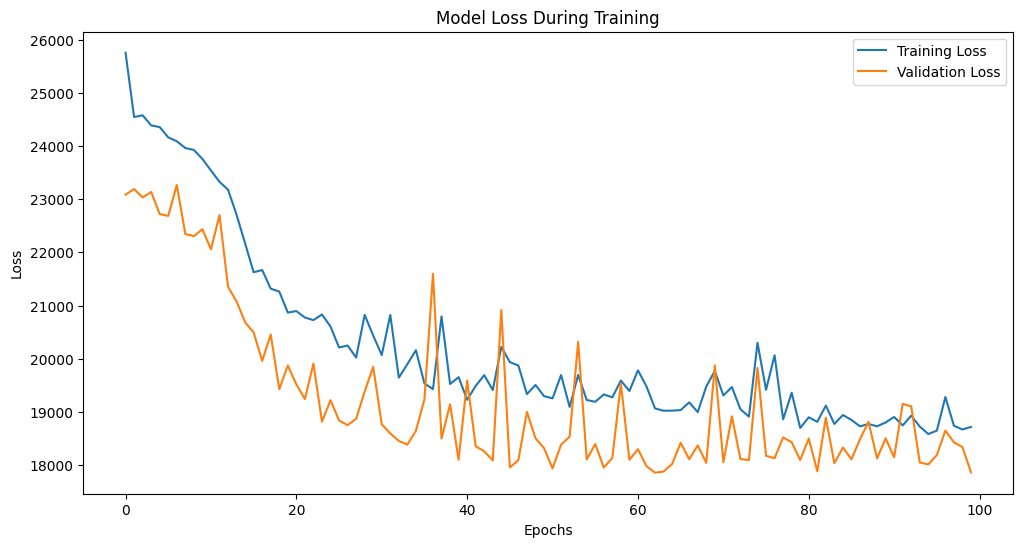

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
#
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAPE on the Training Data: 57.81%
MAPE on the Validation Data: 57.23%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


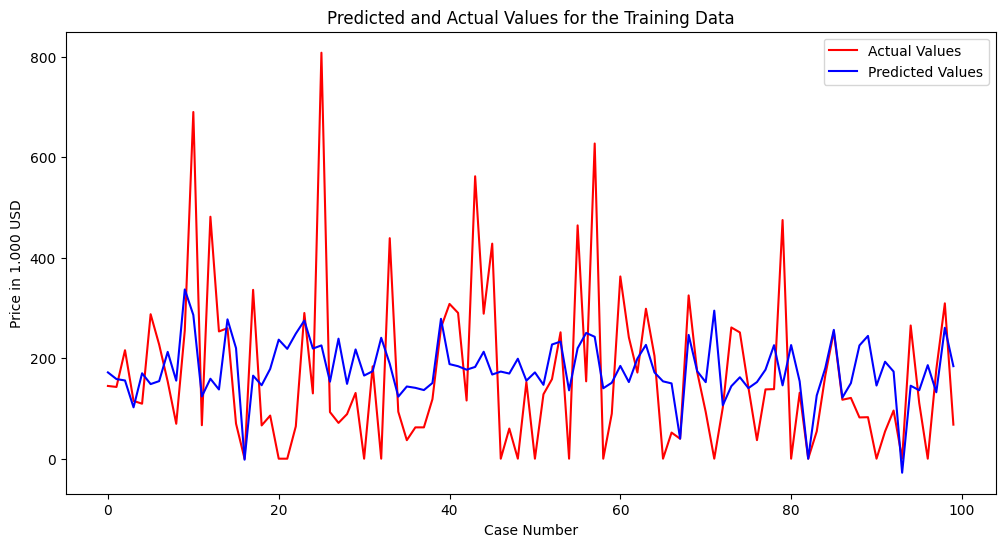

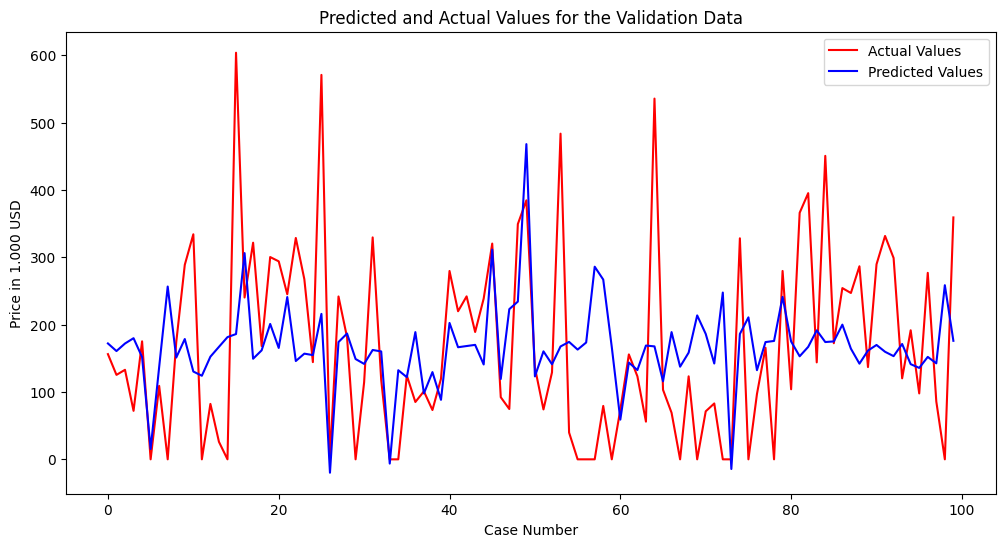

In [86]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')